In [111]:
include("../utils.jl")
data = getdata("../data/10")
println(data[1:2])
function parsedata(d)
    m = match(r"position=<(.*), (.*)> velocity=<(.*), (.*)>", d).captures
    pos = [parse(Int, m[1]), parse(Int, m[2])]
    vel = [parse(Int, m[3]), parse(Int, m[4])]
    return pos, vel
end
data = map(parsedata, data)
pos = map(x -> x[1], data)
vel = map(x -> x[2], data)
println(pos[1:2])
println(vel[1:2])
pos_save = deepcopy(pos);

["position=< 21459,  32026> velocity=<-2, -3>", "position=<-31718, -42462> velocity=< 3,  4>"]
Array{Int64,1}[[21459, 32026], [-31718, -42462]]
Array{Int64,1}[[-2, -3], [3, 4]]


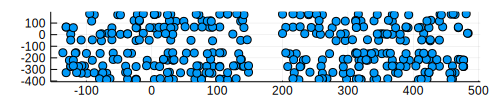

100


In [141]:
using Plots
pos = deepcopy(pos_save)

function plotpoints(pos)
    x = map(x -> x[1], pos)
    y = map(x -> -x[2], pos)
    inline(plot(x, y, seriestype=:scatter, reuse=false, size=(500,100), legend=false))
end

function advance(pos, vel, steps)
    pos[:] = pos + steps*vel
end

# Estimate how many steps
nsteps = zeros(size(pos))
for i=1:length(pos)
    nsteps[i] = abs(maximum(pos[i]./vel[i]))
end
nsteps = filter(x -> !isnan(x) && !isinf(x), nsteps)
nsteps = Int(floor(sum(nsteps)/length(nsteps)))
println(nsteps)

advance(pos, vel, nsteps)

p = []
for step=1:100
    advance(pos, vel, 1)
    plotpoints(pos)
    println(step)
    sleep(0.25)
end

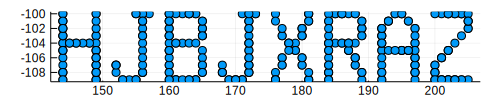

10641


In [138]:
pos = deepcopy(pos_save)
advance(pos, vel, nsteps + 44)
plotpoints(pos)
println(nsteps + 44)